In [1]:
from chemoecology_tools.core import GCMSExperiment
from chemoecology_tools.analysis import (
    calculate_enrichment_table,
    perform_nmds,
    perform_lda,
    perform_pca,
    perform_random_forest,
    calculate_compositional_stats,
)
from chemoecology_tools.visualization import (
    plot_nmds,
    plot_lda,
    plot_pca,
    plot_rf_importance,
)

In [4]:
ABUNDANCE_DATA_PATH = "data\\formatted_relative_abundance.csv"
USER_PROVIDED_SAMPLE_METADATA_PATH = "data\metadataD.csv"
ID_COLUMN = "ID"

In [5]:
# Load experimental data with metadata
experiment = GCMSExperiment.from_files(
    abundance_path=ABUNDANCE_DATA_PATH,
    metadata_path=USER_PROVIDED_SAMPLE_METADATA_PATH,
    id_col=ID_COLUMN,
    fetch_pubchem=True
)

ValueError: ID column 'ID' not found in abundance data

In [58]:
print(experiment)

Unnamed experiment: 25 samples, 48 chemicals measured


In [59]:
# Filter and process data
filtered = experiment.filter_trace_compounds(threshold=0.005)
relative = filtered.calculate_relative_abundance()

In [42]:
filtered.metadata_df.head()

,date,ID,age,treatment,groupID,in_groupID,isoID,colony_of_origin,wing_1_mc_length,wing_2_mc_length,ovary_1_length,ovary_1_width,ovary_2_length,ovary_2_width,notes,sample_prep_notes,GCMS_Run_ID_head,GCMS_Run_ID_abdomen
0,18-Apr,1,7d,iso,NaN,NaN,8.0,comte,2.482,2.456,0.690,0.296,0.715,0.302,late,NaN,1_1,23_2
1,18-Apr,2,7d,group,1.0,1.0,NaN,comte,2.297,2.301,0.716,0.376,0.735,0.398,NaN,NaN,2_1,24_2
2,18-Apr,3,7d,group,1.0,2.0,NaN,comte,2.433,2.411,0.746,0.351,0.838,0.347,NaN,NaN,3_1,25_2
3,18-Apr,4,7d,group,1.0,3.0,NaN,comte,2.368,2.369,0.729,0.385,0.719,0.350,NaN,NaN,4_1,26_2
4,18-Apr,5,7d,group,1.0,4.0,NaN,comte,2.413,NaN,0.603,0.258,0.658,0.282,1 viable wing,leg in head tube,5_1,27_2


In [60]:
import pandas as pd

meta_mask = filtered.metadata_df["treatment"].isin(["iso", "group"])
# chem_mask = pd.Series([
#     filtered.get_chemical_property(c, "class") == "Alkane"
#     for c in filtered.chemical_cols
# ], index=filtered.chemical_cols)

In [61]:
filtered_exp = experiment.filter(
    metadata_mask=meta_mask,
    # chemical_mask=chem_mask
)
print(filtered_exp)

Unnamed experiment: 25 samples, 48 chemicals measured


In [62]:
nmds_df = perform_nmds(filtered)
nmds_df.head()

,NMDS1,NMDS2
0,10.308394,-2.065677
1,1.940561,2.355637
2,3.457034,-2.699859
3,-3.967020,5.916966
4,-1.774399,6.087416


C:\Users\larse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\chemoecology_tools\visualization\plotting.py:144: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(


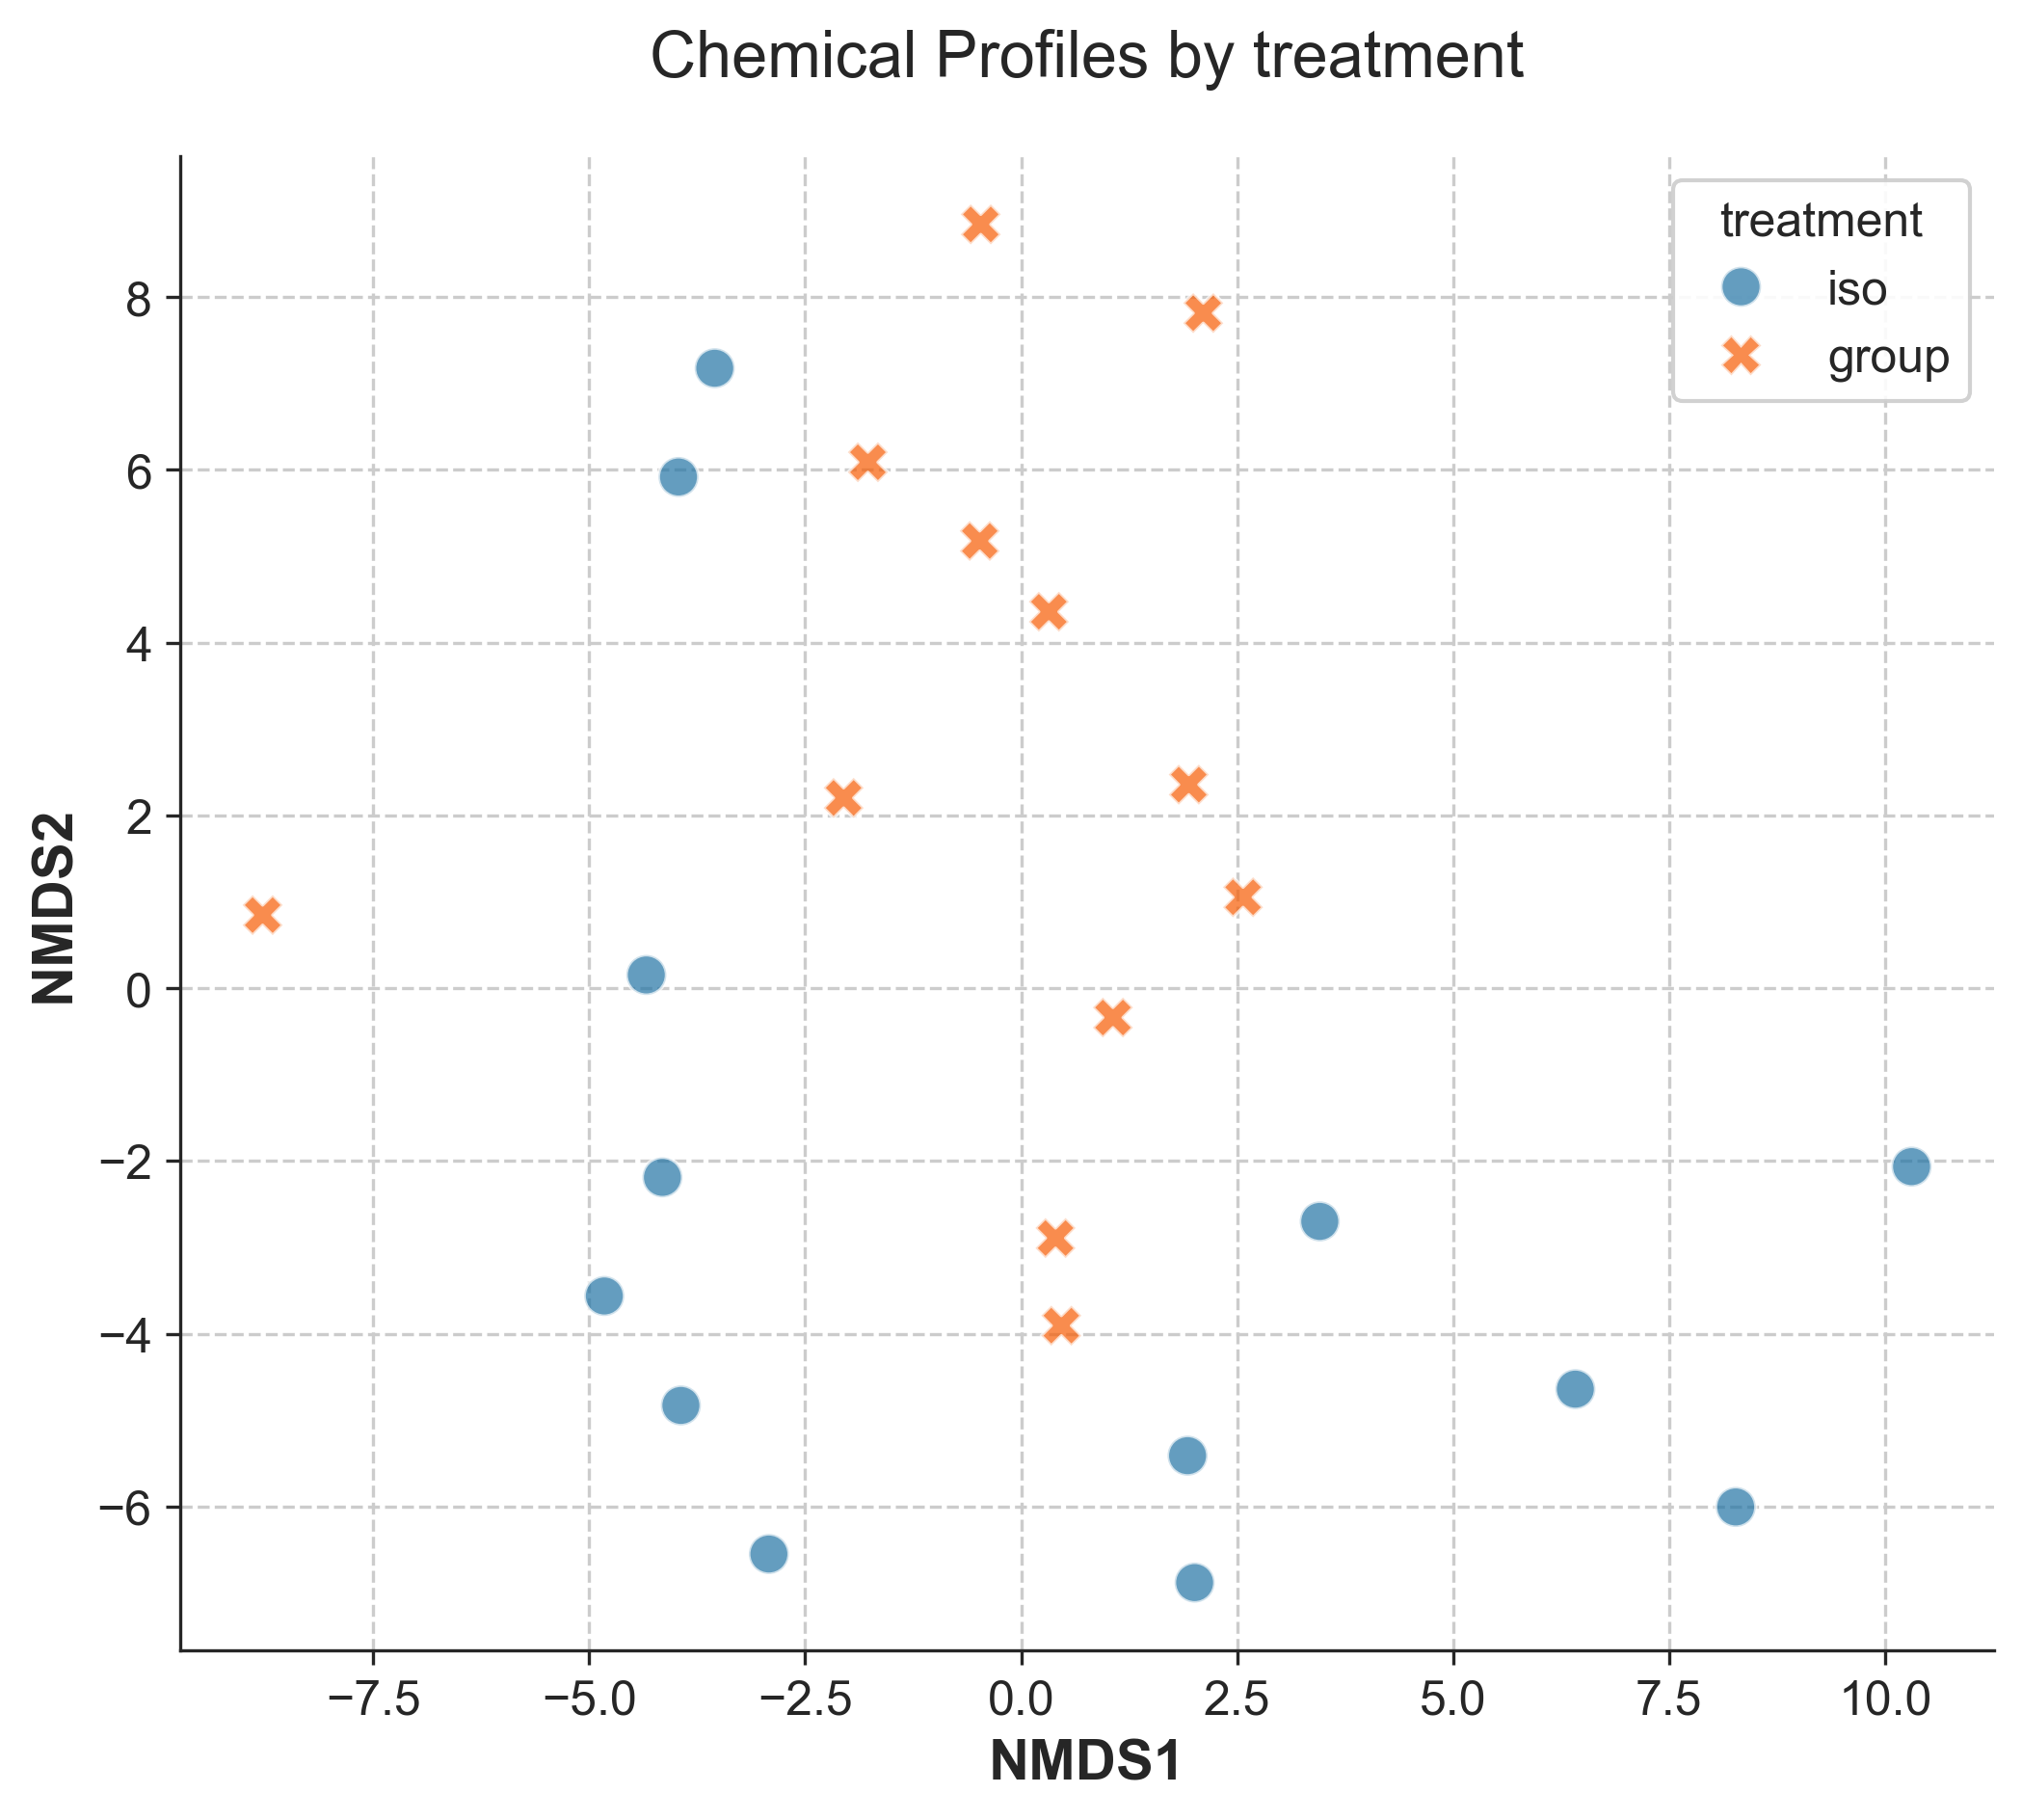

In [63]:
# Create plots with different groupings
# By caste
fig1 = plot_nmds(
    experiment=filtered,
    nmds_coords=nmds_df,
    group_col="treatment",
    title="Chemical Profiles by treatment"
)

In [64]:
clr_output = calculate_compositional_stats(filtered)

In [65]:
results = perform_pca(clr_output) 

PCA explained variance ratios: [3.94609252e-01 1.99060324e-01 1.17099569e-01 7.45278673e-02
 3.85729419e-02 3.18767481e-02 2.75505065e-02 2.49610556e-02
 1.94182920e-02 1.78114026e-02 1.39752287e-02 1.04864904e-02
 7.64719310e-03 4.92907735e-03 4.62338097e-03 3.37358633e-03
 2.77571527e-03 1.85360182e-03 1.36022531e-03 1.04745537e-03
 8.93562091e-04 6.51214108e-04 5.68281903e-04 3.27027323e-04
 1.17563444e-33]


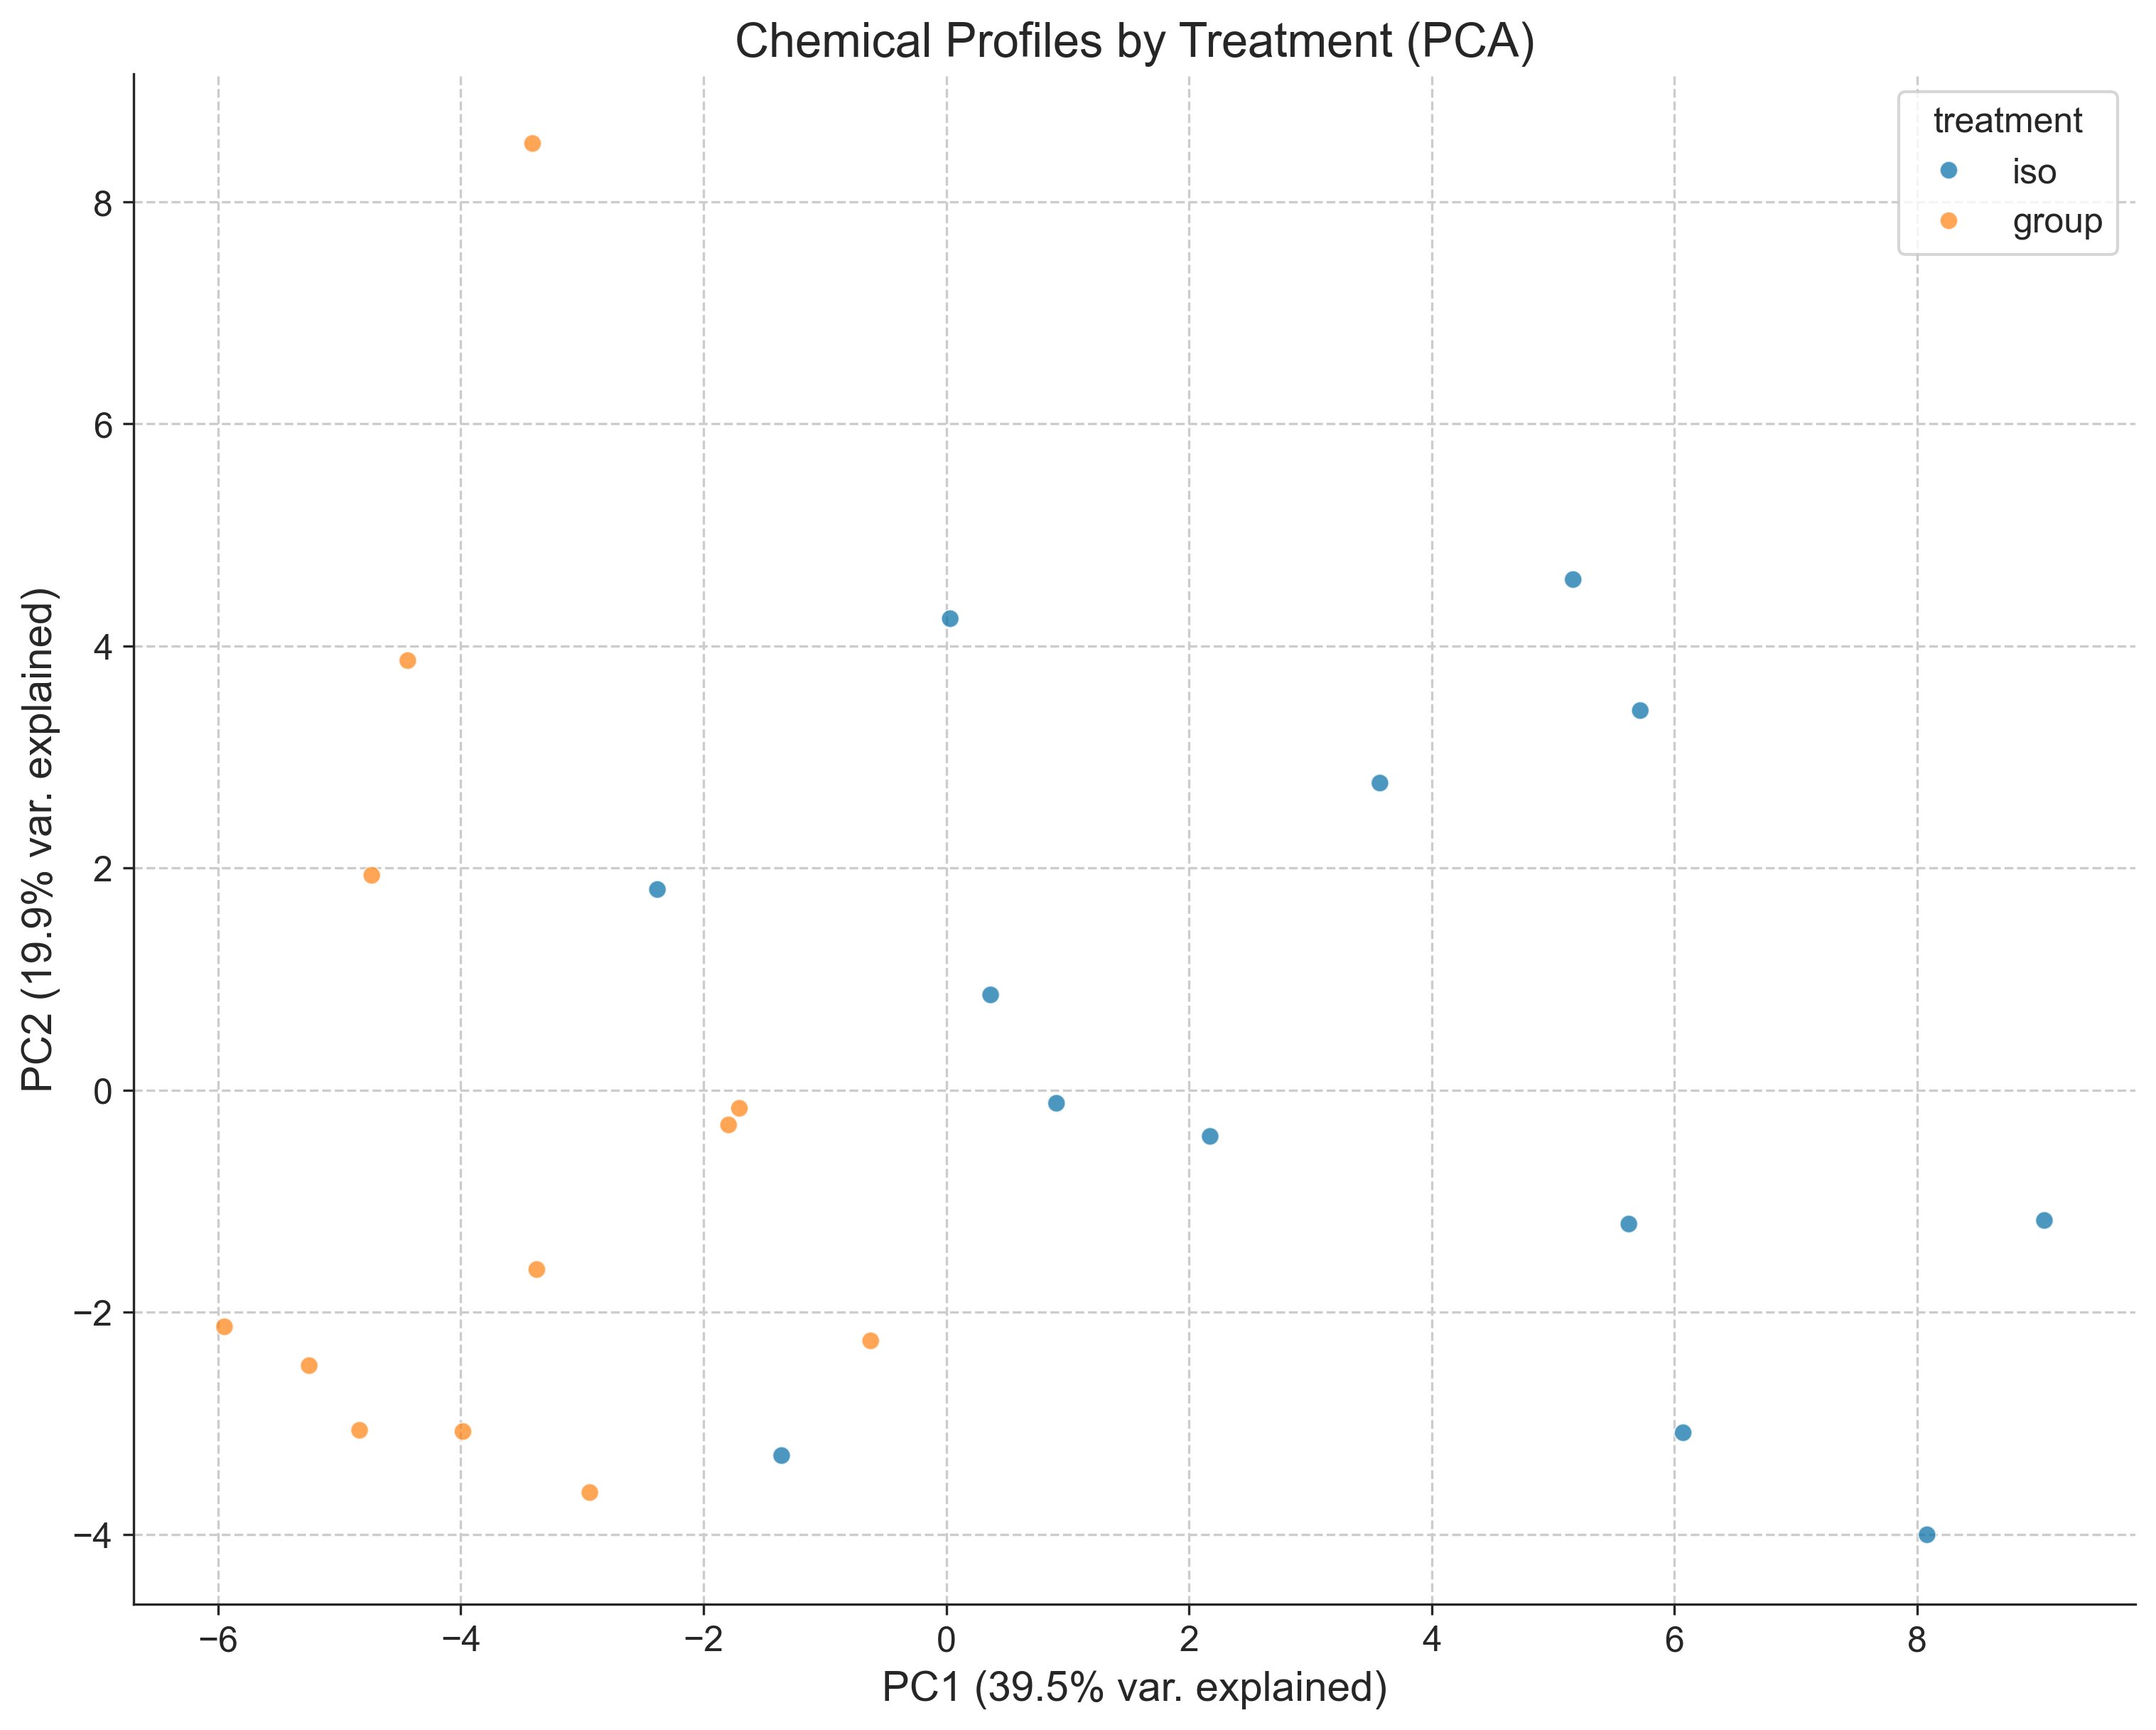

In [66]:
pca_coords = results["coords"]
explained_var = results["explained_variance"]

print(f"PCA explained variance ratios: {explained_var}")
# Create PCA plot
fig2 = plot_pca(
    pca_results=results,
    experiment=filtered,
    group_col="treatment",
    title="Chemical Profiles by Treatment (PCA)"
)

In [ ]:
# Initialize group column and title prefix
group_col = "treatment"
title_prefix = "Chemical Profiles"

# LDA Analysis
transformed_data = calculate_compositional_stats(filtered)
lda_results = perform_lda(
    transformed_data=transformed_data,
    experiment=filtered,
    group_col=group_col,
    n_components = 2
)

In [82]:
print(lda_results)

{'coords':           LD1
0   10.009761
1  -11.701963
2   10.199997
3    9.156266
4  -10.429809
5    8.578729
6  -11.625722
7    9.747011
8  -11.751203
9   -7.703459
10  -9.783851
11  10.478206
12  -8.529643
13  -8.144558
14   9.495337
15 -13.158172
16   8.899712
17  10.333013
18 -10.753817
19   9.283342
20   9.139582
21 -10.787085
22   9.558049
23 -13.628861
24 -10.423226, 'classification_report': '              precision    recall  f1-score   support\n\n       group       0.80      1.00      0.89         4\n         iso       1.00      0.75      0.86         4\n\n    accuracy                           0.88         8\n   macro avg       0.90      0.88      0.87         8\nweighted avg       0.90      0.88      0.87         8\n', 'lda_obj': LinearDiscriminantAnalysis(), 'training_data': (array([[ 0.82819705,  0.86124382,  1.0559089 ,  0.22992864, -0.91936347,
         0.48845734,  0.42611618,  0.49074838,  0.84542271, -0.83535671,
         0.49992946,  0.0210572 , -0.18128334,  1.110781

ValueError: Could not interpret value `LD2` for `y`. An entry with this name does not appear in `data`.

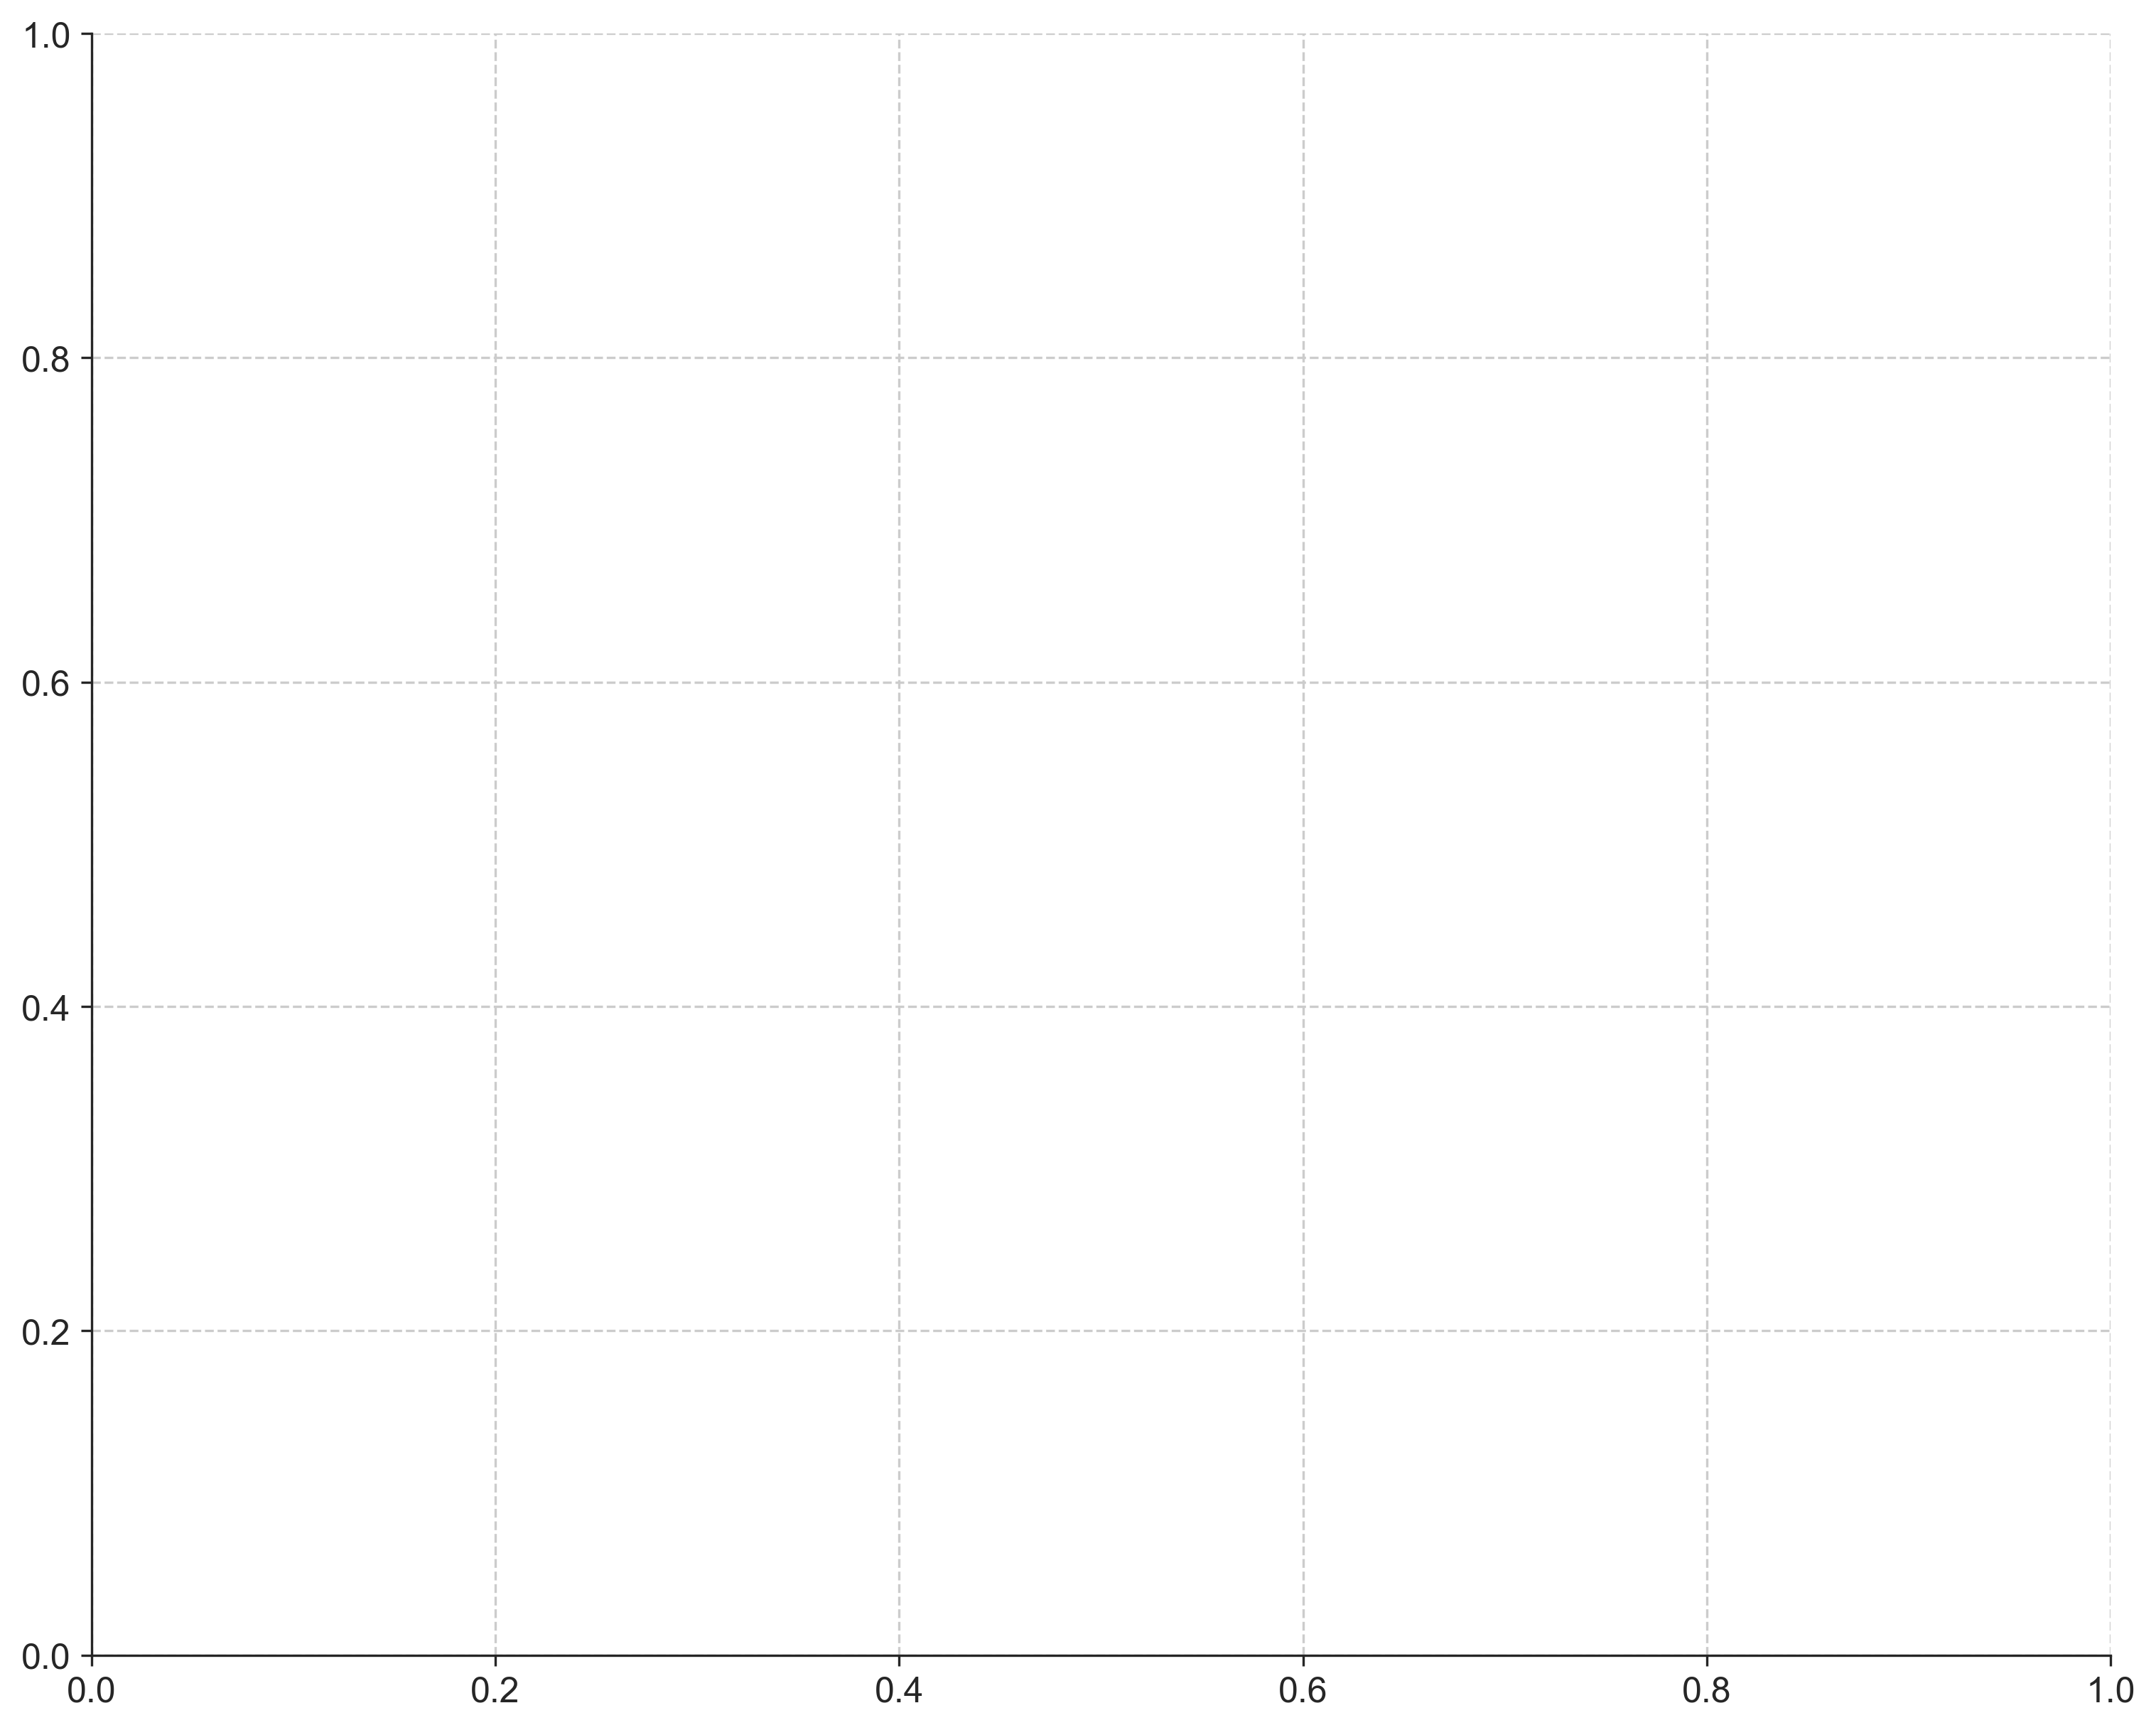

In [83]:
fig_lda = plot_lda(
    lda_results=lda_results,
    experiment=filtered,
    group_col=group_col,
    title=f"{title_prefix} by {group_col}"
)


In [ ]:

pca_results = perform_pca(transformed_data)

fig_pca = plot_pca(
    pca_results=pca_results,
    experiment=filtered,
    group_col=group_col,
    title=f"{title_prefix} by {group_col}"
)

In [70]:
# Generate enrichment table
enrichment_table = calculate_enrichment_table(
    experiment=filtered,
    group_column='treatment',
    alpha=0.05
)

In [71]:
enrichment_table.head()

,Chemical Class,Compound,KW_pvalue,Group Bias,iso,group
0,None,Carvone,0.014378,iso,0.83 ± 0.19,0.29 ± 0.10
12,None,Decanoic.Acid..Dodecyl.Ester,0.744154,,2.33 ± 0.30,2.21 ± 0.24
25,None,Decanoic.acid..Hexadecyl.Ester,0.703389,,0.18 ± 0.04,0.16 ± 0.08
9,None,Docosane,0.384145,,1.05 ± 0.19,1.31 ± 0.23
37,None,Eicosenoic.Acid..Decyl.Ester,0.414562,,2.49 ± 0.51,1.91 ± 0.36


In [72]:
rf_results = perform_random_forest(
    transformed_data=transformed_data,
    experiment=filtered,
    group_col="treatment",
    test_size=0.3
)

C:\Users\larse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\chemoecology_tools\visualization\plotting.py:270: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


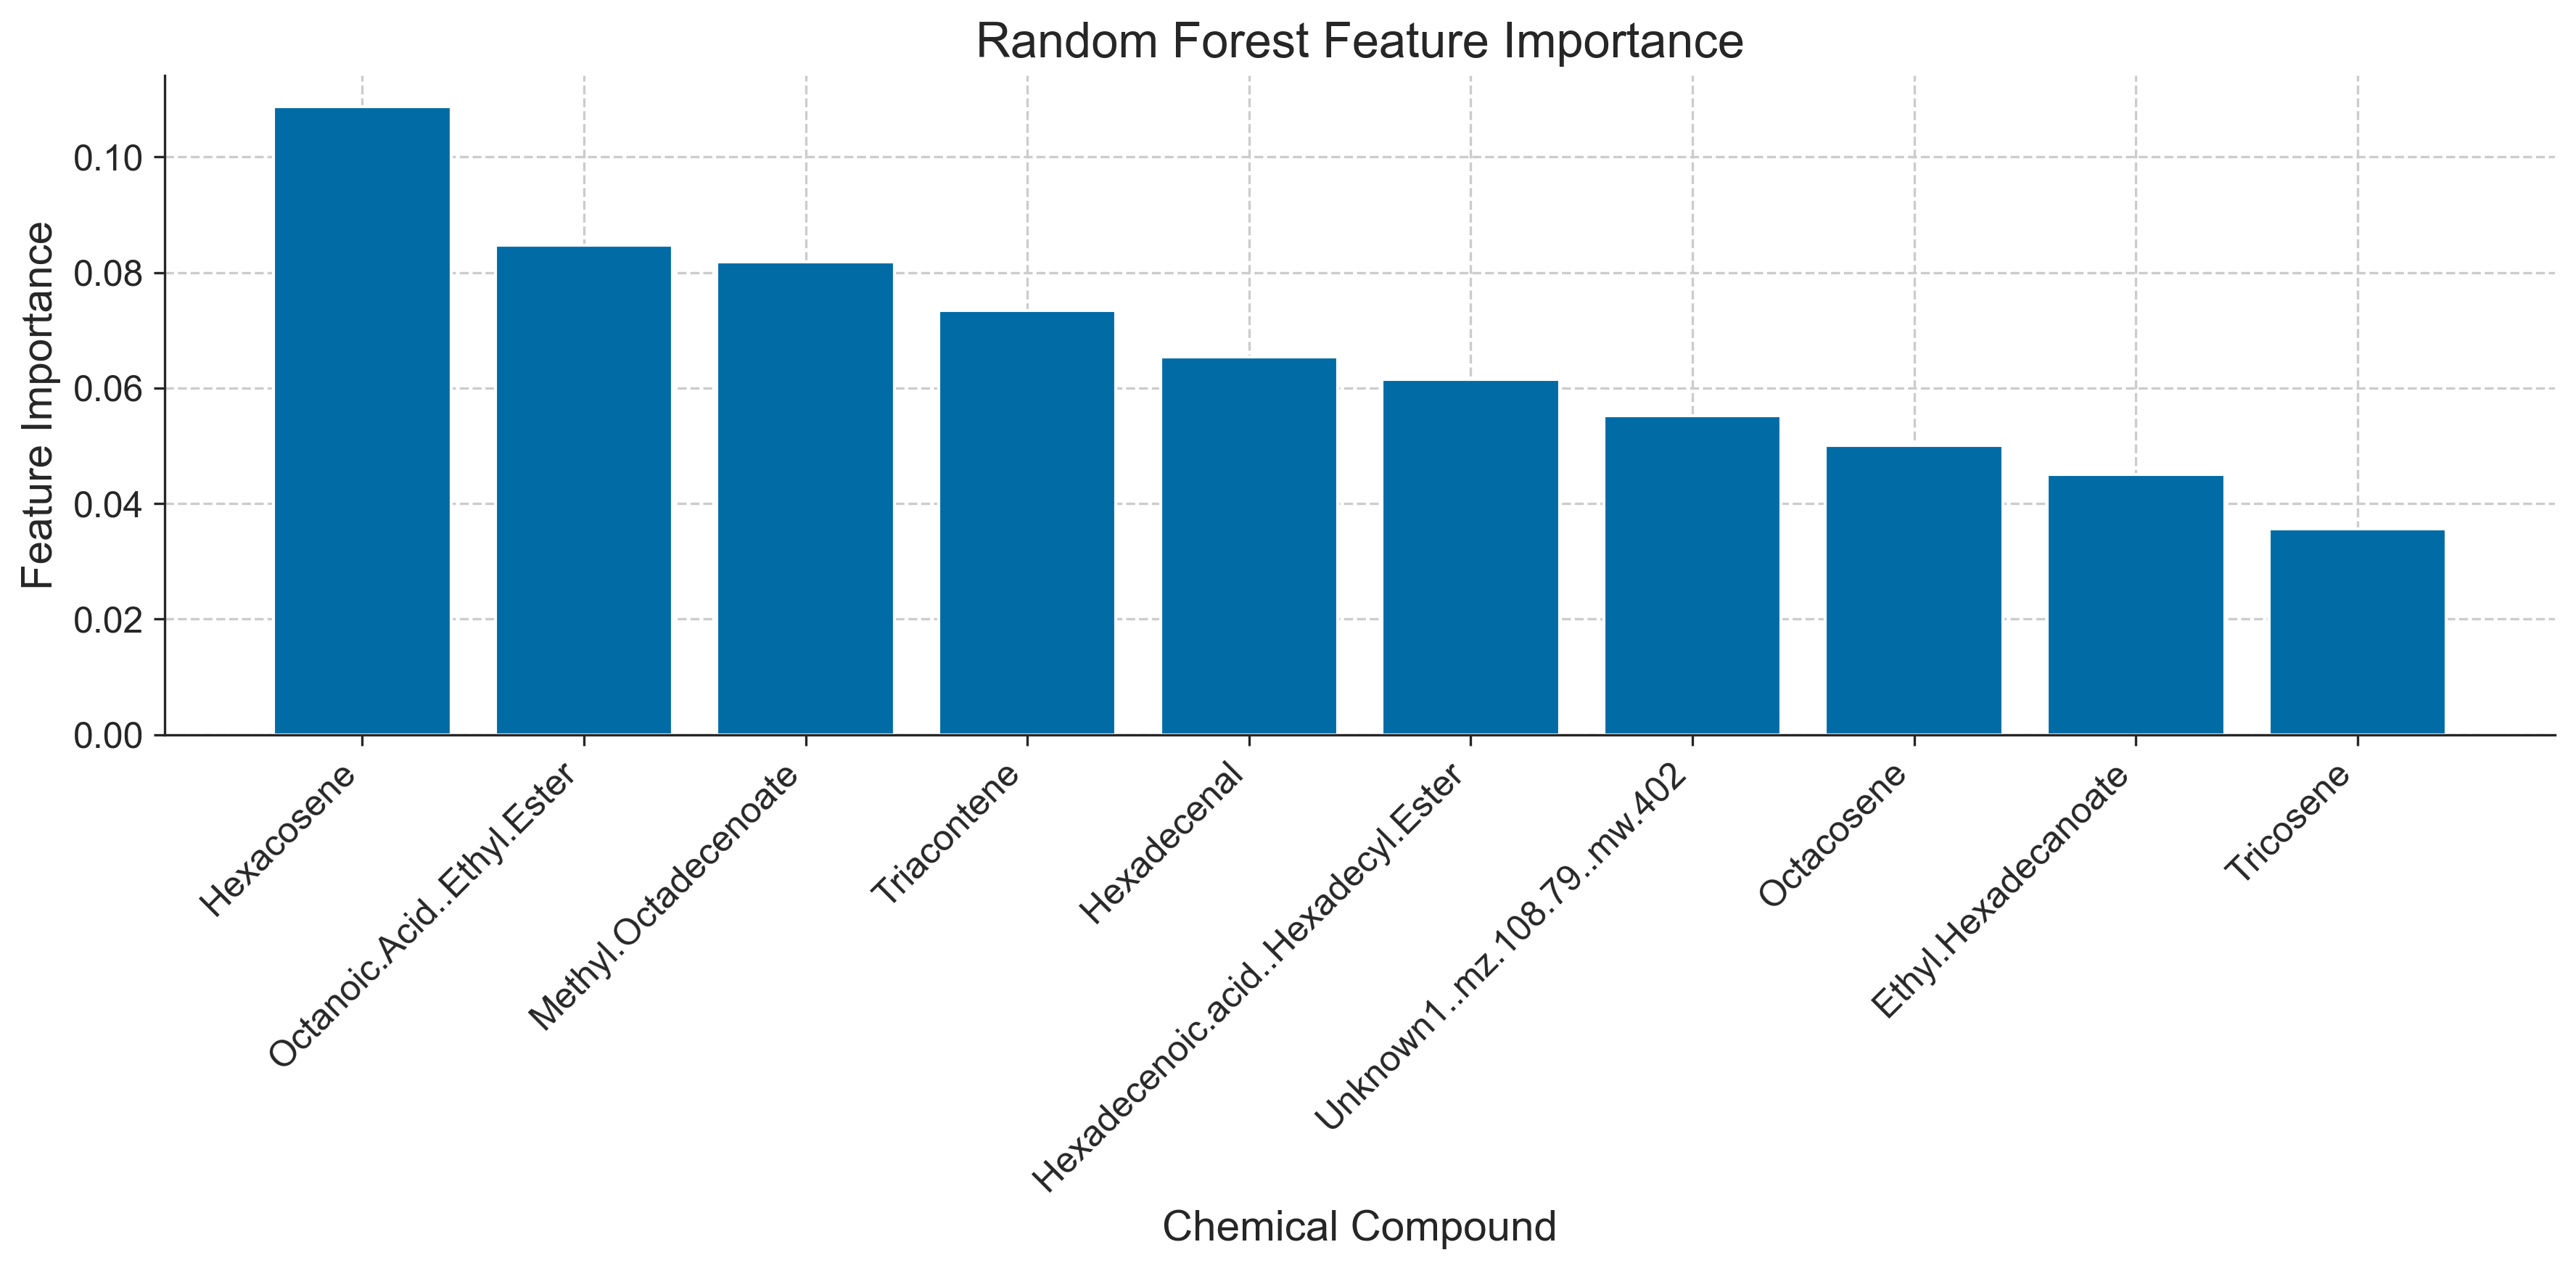

In [73]:
rf_fig = plot_rf_importance(rf_results, title="Random Forest Feature Importance")